# HW 1: Yosemite Data

### Download Google Trends data at www.google.com/trends. Merge the search data with the Yosemite visitor data.
 - Search term: Yosemite
 - Select US, 1/1/2004 – 12/31/2023 (date), Travel (category), web search
 - Download as csv and delete unnecessary information (the first two rows)
 - Change variable names to ‘date’ and ‘search’.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('Yosemite Trends.csv')
df1.head()

,Month,Search
0,2004-01,41
1,2004-02,47
2,2004-03,55
3,2004-04,66
4,2004-05,78


In [4]:
df1 = df1.rename(columns = ({'Month': 'date', 'Search': 'search'}))
df1.head()

,date,search
0,2004-01,41
1,2004-02,47
2,2004-03,55
3,2004-04,66
4,2004-05,78


In [6]:
df1['year'] = pd.to_numeric(df1['date'].str.split('-').str[0])
df1['month']= pd.to_numeric(df1['date'].str.split('-').str[1])

df1.head()

,date,search,year,month
0,2004-01,41,2004,1
1,2004-02,47,2004,2
2,2004-03,55,2004,3
3,2004-04,66,2004,4
4,2004-05,78,2004,5


### Import the visitor data from Yosemite
Rename columns and pivot the table to make it easier to merge

In [12]:
df2 = pd.read_csv('Yosemite Visit.csv')
df2.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,2023,"107,256","107,012","25,005","205,802","322,308","487,618","580,357","593,378","559,464","488,566","252,249","168,055"
1,2022,"137,057","170,196","192,634","285,601","380,905","470,045","396,833","518,407","424,374","381,612","178,786","131,100"
2,2021,"67,284","128,222","159,906","257,158","348,006","429,980","509,874","432,038","356,030","284,611","185,213","129,273"
3,2020,"132,742","167,778","92,324",0,0,"236,534","501,068","375,226","258,561","249,827","136,799","117,454"
4,2019,"116,746","111,665","173,610","297,207","393,004","496,625","717,462","703,153","584,664","448,939","230,598","149,188"


In [16]:
df2 = df2.rename(columns = ({'Year': 'year', 'JAN': '1', 'FEB': '2', 'MAR': '3', 'APR': '4',  'MAY': '5', 'JUN': '6', 'JUL': '7', 'AUG': '8', 'SEP': '9', 'OCT': '10', 'NOV': '11', 'DEC': '12',}))
df2.head()

,year,1,2,3,4,5,6,7,8,9,10,11,12
0,2023,"107,256","107,012","25,005","205,802","322,308","487,618","580,357","593,378","559,464","488,566","252,249","168,055"
1,2022,"137,057","170,196","192,634","285,601","380,905","470,045","396,833","518,407","424,374","381,612","178,786","131,100"
2,2021,"67,284","128,222","159,906","257,158","348,006","429,980","509,874","432,038","356,030","284,611","185,213","129,273"
3,2020,"132,742","167,778","92,324",0,0,"236,534","501,068","375,226","258,561","249,827","136,799","117,454"
4,2019,"116,746","111,665","173,610","297,207","393,004","496,625","717,462","703,153","584,664","448,939","230,598","149,188"


In [21]:
melted_df = pd.melt(df2, id_vars='year', var_name='month', value_name='visits')
melted_df['month'] = melted_df['month'].astype(int)
df3 = melted_df.sort_values(by=['year', 'month']).reset_index(drop=True)

df3.head()

,year,month,visits
0,1979,1,"72,701"
1,1979,2,"72,926"
2,1979,3,"87,950"
3,1979,4,"136,275"
4,1979,5,"210,756"


### Converting visits into floats instead of strings

In [46]:
df3['visits'] = df3['visits'].str.replace(',', '').astype(float)
df3.head()

,year,month,visits
0,1979,1,72701.0
1,1979,2,72926.0
2,1979,3,87950.0
3,1979,4,136275.0
4,1979,5,210756.0


In [47]:
df = pd.merge(df1, df3, on=['year', 'month'], how='inner')
df.head()

,date,search,year,month,visits
0,2004-01,41,2004,1,100020.0
1,2004-02,47,2004,2,106258.0
2,2004-03,55,2004,3,146876.0
3,2004-04,66,2004,4,228212.0
4,2004-05,78,2004,5,326017.0


### Create the lagged variables
- L1Visit, L12Visit, L1Search, L12Search (L1: Lagged by one month, L12: Lagged by 12 months)

In [48]:
df['L1visits'] = df.visits.shift(1)
df['L12visits'] = df.visits.shift(12)
df['L1search'] = df.search.shift(1)
df['L2search'] = df.search.shift(2)
df['L12search'] = df.search.shift(12)

df.head()

,date,search,year,month,visits,L1visits,L12visits,L1search,L2search,L12search
0,2004-01,41,2004,1,100020.0,NaN,NaN,NaN,NaN,NaN
1,2004-02,47,2004,2,106258.0,100020.0,NaN,41.0,NaN,NaN
2,2004-03,55,2004,3,146876.0,106258.0,NaN,47.0,41.0,NaN
3,2004-04,66,2004,4,228212.0,146876.0,NaN,55.0,47.0,NaN
4,2004-05,78,2004,5,326017.0,228212.0,NaN,66.0,55.0,NaN


In [49]:
df = df.dropna() 
df.head()

,date,search,year,month,visits,L1visits,L12visits,L1search,L2search,L12search
12,2005-01,37,2005,1,91238.0,96745.0,100020.0,34.0,36.0,41.0
13,2005-02,40,2005,2,103756.0,91238.0,106258.0,37.0,34.0,47.0
14,2005-03,53,2005,3,143335.0,103756.0,146876.0,40.0,37.0,55.0
15,2005-04,60,2005,4,195385.0,143335.0,228212.0,53.0,40.0,66.0
16,2005-05,89,2005,5,304552.0,195385.0,326017.0,60.0,53.0,78.0


## 1. Run the following regression models and report coefficients.
(L1: Lagged by one month, L12: Lagged by 12 months)
 - M1 (base model): Visit = β0 + β1 L1visit + β2 L12visit
 - M2: Visit = β0 + β1 L1visit + β2 L12visit + β3 Search
 - M3: Visit = β0 + β1 L1visit + β2 L12visit + β3 L1Search
 - M4: Visit = β0 + β1 L1visit + β2 L12visit + β3 L1Search + β4 L12Search
 - M5: Visit = β0 + β1 L1visit + β2 L12visit + β3 L1Search + β4 L2Search + β5 L12Search

In [50]:
y = df.visits
x1 = df[['L1visits', 'L12visits']]
x2 = df[['L1visits', 'L12visits', 'search']]
x3 = df[['L1visits', 'L12visits', 'L1search']]
x4 = df[['L1visits', 'L12visits', 'L1search', 'L12search']]
x5 = df[['L1visits', 'L12visits', 'L1search', 'L2search', 'L12search']]

In [51]:
m1 = LinearRegression().fit(x1, y)
print('Coefficients', m1.coef_)

m2 = LinearRegression().fit(x2, y)
print('Coefficients', m2.coef_)

m3 = LinearRegression().fit(x3, y)
print('Coefficients', m3.coef_)

m4 = LinearRegression().fit(x4, y)
print('Coefficients', m4.coef_)

m5 = LinearRegression().fit(x5, y)
print('Coefficients', m5.coef_)

Coefficients [0.36380191 0.62875872]
Coefficients [4.16804559e-01 4.88081468e-01 2.53717231e+03]
Coefficients [3.40646065e-01 5.63411428e-01 1.79223968e+03]
Coefficients [3.82583042e-01 5.07757973e-01 1.21196818e+03 1.20408245e+03]
Coefficients [ 4.68444175e-01  4.64768064e-01  2.88581305e+03 -2.51286323e+03
  1.20804803e+03]


## 2. Compare the MSEs of the four models. Determine which model best fits the data.

In [52]:
pred1 = m1.predict(x1)
pred2 = m2.predict(x2)
pred3 = m3.predict(x3)
pred4 = m4.predict(x4)
pred5 = m5.predict(x5)

In [54]:
mse1 = mean_squared_error(y, pred1)
mse2 = mean_squared_error(y, pred2)
mse3 = mean_squared_error(y, pred3)
mse4 = mean_squared_error(y, pred4)
mse5 = mean_squared_error(y, pred5)

print('mse1 =', mse1)
print('mse2 =', mse2)
print('mse3 =', mse3)
print('mse4 =', mse4)
print('mse5 =', mse5)

mse1 = 4758344811.585077
mse2 = 3986721147.38264
mse3 = 4428836235.059015
mse4 = 4276672882.2648253
mse5 = 3960502813.2416162


Calculate the percentage by which the best model improves MSE over the base
model.

In [55]:
(mse5-mse1)/mse1

-0.16767216961683104

## 3. Graphing 
Graph actual vs. predicted visits with three lines in one graph: actual visitors,
predicted visitors from the base model, and predicted visitors from the best model.

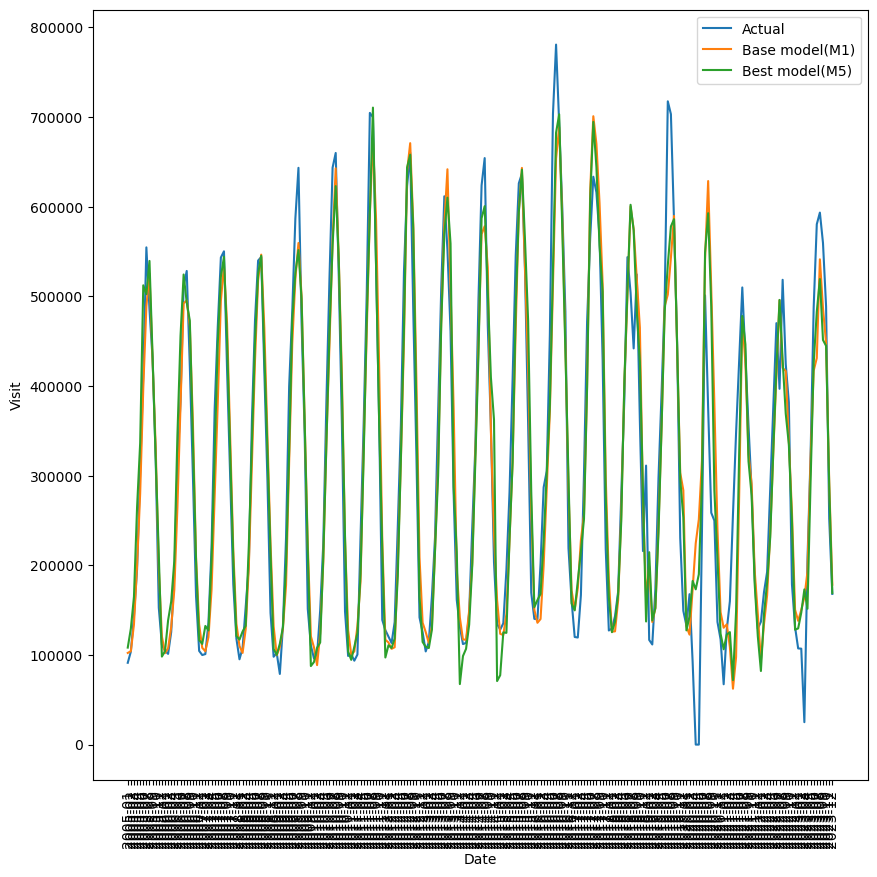

In [61]:
plt.figure(figsize=(10, 10))
plt.xlabel('Date')
plt.ylabel('Visit')

plt.plot(df.date, df.visits)
plt.plot(df.date, pred1)
plt.plot(df.date, pred5) 
plt.legend(['Actual', 'Base model(M1)', 'Best model(M5)'])
plt.xticks(rotation=90)
plt.show()